In [29]:
# Program to find the best features to use for identifying MACs in a PCAP file

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

df = pd.read_csv('test_iot1.csv')
df = df.drop(columns =['No.','Epoch Time', 'Time', 'Source', 'Destination'])
strings_only = df.select_dtypes(include=[object])

# print(strings_only)
for col in strings_only:
    strings_only[col+' Num'] = [hash(val) for val in strings_only[col]]

df_2 = df.drop(columns =['MAC Destination', 'Protocol', 'Info'])#, 'Source', 'Destination'])
df_3 = strings_only.iloc[: , 5:]
df = pd.merge(df_2, df_3, left_index=True, right_index=True)
df['Source Port'] = df['Source Port'].fillna(0)
df['Destination Port'] = df['Destination Port'].fillna(0)
df = df.dropna()
per_of_rows = 0.50
rows = int(len(df)*per_of_rows)
df = df[:rows]

<ipython-input-29-f841ac0223b0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strings_only[col+' Num'] = [hash(val) for val in strings_only[col]]


In [31]:
X = df[['Length', 'Delta Time', 'Source Port', 'Destination Port', 'Info Num', 'Protocol Num', 'MAC Destination Num']]#, 'Source Num', 'Destination Num']]y = df['MAC Source']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[0.1497952  0.04788039 0.28548266 0.1260593  0.09023315 0.11175497
 0.18879432]


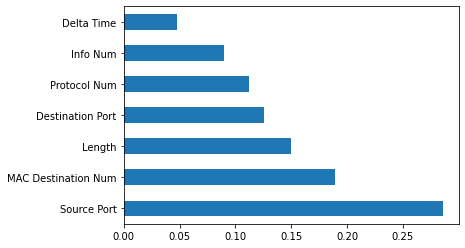

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()